<a href="https://colab.research.google.com/github/as9786/ML-DLPratice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%99%B8%EA%B5%AD%EC%96%B4%EB%AC%B8%EC%9E%A5%ED%8C%90%EB%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 언어 판별 프로그램

In [1]:
from sklearn import svm, metrics
import glob, os.path, re, json

In [2]:
#텍스트를 읽어들이고 출현 빈도 조사하기
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match('^[a-z]{2,}',name).group()
    with open(fname,'r',encoding='utf-8') as f:
        text = f.read()
    text = text.lower()
    #숫자 세기 변수 초기화
    cnt = [0 for n in range(0,26)]
    code_a = ord("a")
    code_z = ord('z')
    #알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a<=n<code_z: #a~z 사이에 있을 때
            cnt[n-code_a] += 1
    # 정규화하기
    total = sum(cnt)
    freq = list(map(lambda n: n/total,cnt))
    return (freq,lang)

In [4]:
# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {'freqs':freqs,'labels':labels}

In [5]:
data = load_files('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/train/*.txt')
test = load_files('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/test/*.txt')

In [32]:
# 이후를 대비해서 JSON으로 결과 저장하기
with open('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/freq.json','w',encoding='utf-8') as fp:
    json.dump([data,test],fp)

In [15]:
data

{'freqs': [[0.07598519486174614,
   0.012845634661441323,
   0.045721750489875895,
   0.04615719573263662,
   0.10537774874809493,
   0.015676028739386023,
   0.019159590681471803,
   0.043762246897452645,
   0.07402569126932289,
   0.0017417809710428913,
   0.0054430655345090355,
   0.05377748748094927,
   0.02634443718702373,
   0.07750925321140867,
   0.08970172000870891,
   0.016546919224907468,
   0.0,
   0.07772697583278902,
   0.06139777922926192,
   0.08055736991073373,
   0.025908991944263007,
   0.009797517962116264,
   0.014151970389723493,
   0.0006531678641410843,
   0.020030481166993252,
   0.0],
  [0.0842281078501551,
   0.019923645907897875,
   0.03042233357193987,
   0.03889286566451921,
   0.13707945597709378,
   0.017418277260796946,
   0.031257456454306845,
   0.027439751849200666,
   0.07539966595084706,
   0.0026246719160104987,
   0.009782868050584585,
   0.04235266046289669,
   0.024218563588642328,
   0.053567167740396084,
   0.0688379861608208,
   0.0202815557

In [7]:
clf = svm.SVC()
clf.fit(data['freqs'],data['labels'])

SVC()

In [9]:
predict = clf.predict(test['freqs'])

In [16]:
ac_score = metrics.accuracy_score(test['labels'],predict)
cl_report = metrics.classification_report(test['labels'],predict)
print('정답률=',ac_score)
print('리포트=')
print(cl_report)

정답률= 1.0
리포트=
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## 데이터마다의 분포를 그래프로 확인하기

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# 알파벳 출현 빈도 데이터 읽어 들이기
with open('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/freq.json','r',encoding='utf-8') as fp:
    freq = json.load(fp)

In [19]:
# 언어마다 계산하기
lang_dic = {}
for i, lbl in enumerate(freq[0]['labels']):
    fq = freq[0]['freqs'][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx,v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx]+v)/2

In [20]:
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic,index=asclist)

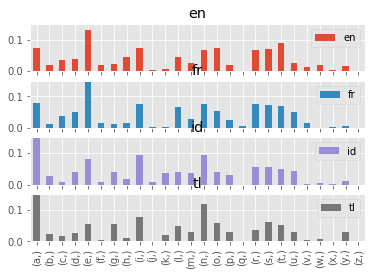

In [21]:
plt.style.use('ggplot')
df.plot(kind='bar',subplots=True,ylim=(0,0.15))
plt.savefig('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/lang-plot.png')

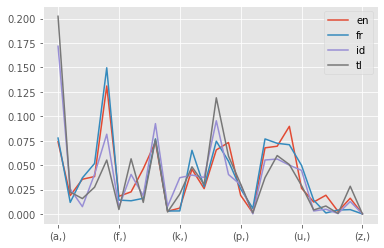

In [22]:
plt.style.use('ggplot')
df.plot(kind='line')
plt.show()

# 웹 인터페이스 추가하기

## 학습한 매개변수를 저장하는 프로그램

In [24]:
import joblib

In [26]:
with open('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/freq.json','r',encoding='utf-8') as fp:
    d = json.load(fp)
    data = d[0]

In [31]:
clf = svm.SVC()
clf.fit(data['freqs'],data['labels'])

SVC()

In [33]:
joblib.dump(clf,'/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/freq.pkl')
print('ok')

ok


## 웹에서 사용할 수 있는 언어 판별 애플리케이션

In [34]:
import cgi

In [41]:
pklfile = os.path.dirname('/content/drive/MyDrive/머신러닝,딥러닝실전/4장/lang/freq.pkl')+'/freq.pkl'

In [42]:
clf = joblib.load(pklfile)

In [43]:
# 텍스트 입력 양식 출력하기
def show_form(text,msg=''):
    print('Content-Type: text/html; charset=utf-8')
    print('')
    print('')
    print("""
        <html><body><form>
        <textarea name="text" rows="8" cols="40">{0}</textarea>
        <p><input type="submit" value="판정"></p>
        <p>{1}</p>
        </form></body></html>
    """.format(cgi.escape(text), msg))

In [44]:
# 판정하기
def detect_lang(text):
    # 알파벳 출현 빈도 구하기
    text = text.lower() 
    code_a, code_z = (ord("a"), ord("z"))
    cnt = [0 for i in range(26)]
    for ch in text:
        n = ord(ch) - code_a
        if 0 <= n < 26: cnt[n] += 1
    total = sum(cnt)
    if total == 0: return "입력이 없습니다"
    freq = list(map(lambda n: n/total, cnt))
    # 언어 예측하기
    res = clf.predict([freq])
    # 언어 코드를 한국어로 변환하기
    lang_dic = {"en":"영어","fr":"프랑스어",
        "id":"인도네시아어", "tl":"타갈로그어"}
    return lang_dic[res[0]]

In [45]:
# 입력 양식의 값 읽어 들이기
form = cgi.FieldStorage()
text = form.getvalue("text", default="")
msg = ""
if text != "":
    lang = detect_lang(text)
    msg = "판정 결과:" + lang

In [46]:
show_form(text, msg)

Content-Type: text/html; charset=utf-8



        <html><body><form>
        <textarea name="text" rows="8" cols="40"></textarea>
        <p><input type="submit" value="판정"></p>
        <p></p>
        </form></body></html>
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: cgi.escape is deprecated, use html.escape instead
  if sys.path[0] == '':
